In [1]:
from imp import reload
import TraitData
reload(TraitData)
import sklearn
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
%config InlineBackend.figure_format = 'retina'


# Feature Importance analysis

## Load The Data. 

In [2]:
DATAFILE = "../data/angert_etal_2011/plants5.csv"
RESPONSE = "migration_m"
CATEGORIES = [
     'oceanity',
     'dispersal_mode',
     'BreedSysCode',
     'Grime'
]
DROPVARS = [
    "Taxon",
    "migr_sterr_m",
    "shift + 2SE",
    "signif_shift",
    "signif_shift2",
    "DispModeEng"
    
]
DROPNA = 1## drop features (0 for drop samples)

data = TraitData.TraitData(DATAFILE,
                           RESPONSE,
                           DROPVARS, 
                           CATEGORIES,
                           DROPNA, scale=True)

#data.new_X = Imputer(missing_values='NaN', strategy='mean').fit_transform(data.X)

X, x_test, Y, y_test = train_test_split(data.X, data.Y, test_size=0.30)

/Users/tony/miniconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning:

Data with input dtype uint8 was converted to float64 by the scale function.



## Linear Regression, Straight Up. 

In [3]:
scaler = sklearn.preprocessing.StandardScaler()
scaled_X = X#scaler.fit_transform(X)
scaled_test = x_test#scaler.transform(x_test)
ols = linear_model.LinearRegression(fit_intercept=False)
ols.fit(scaled_X,Y)
print(len(ols.coef_))
error = sklearn.metrics.mean_squared_error(y_test, ols.predict(scaled_test))
print(error)

26
2.71203040662


[-0.12009834  0.42056389 -0.50818901  0.34034391 -0.70178212  1.15404594
  0.49065743  0.59712833  0.85869755 -0.11958323  0.8341123   0.60120687
  0.16777128  0.27194041 -0.01720358  0.15918388  0.12479146 -0.21866254
 -0.55984933  0.88096924  0.32296668 -0.64475541 -0.22473182 -1.20708116
 -0.61037479  0.        ]


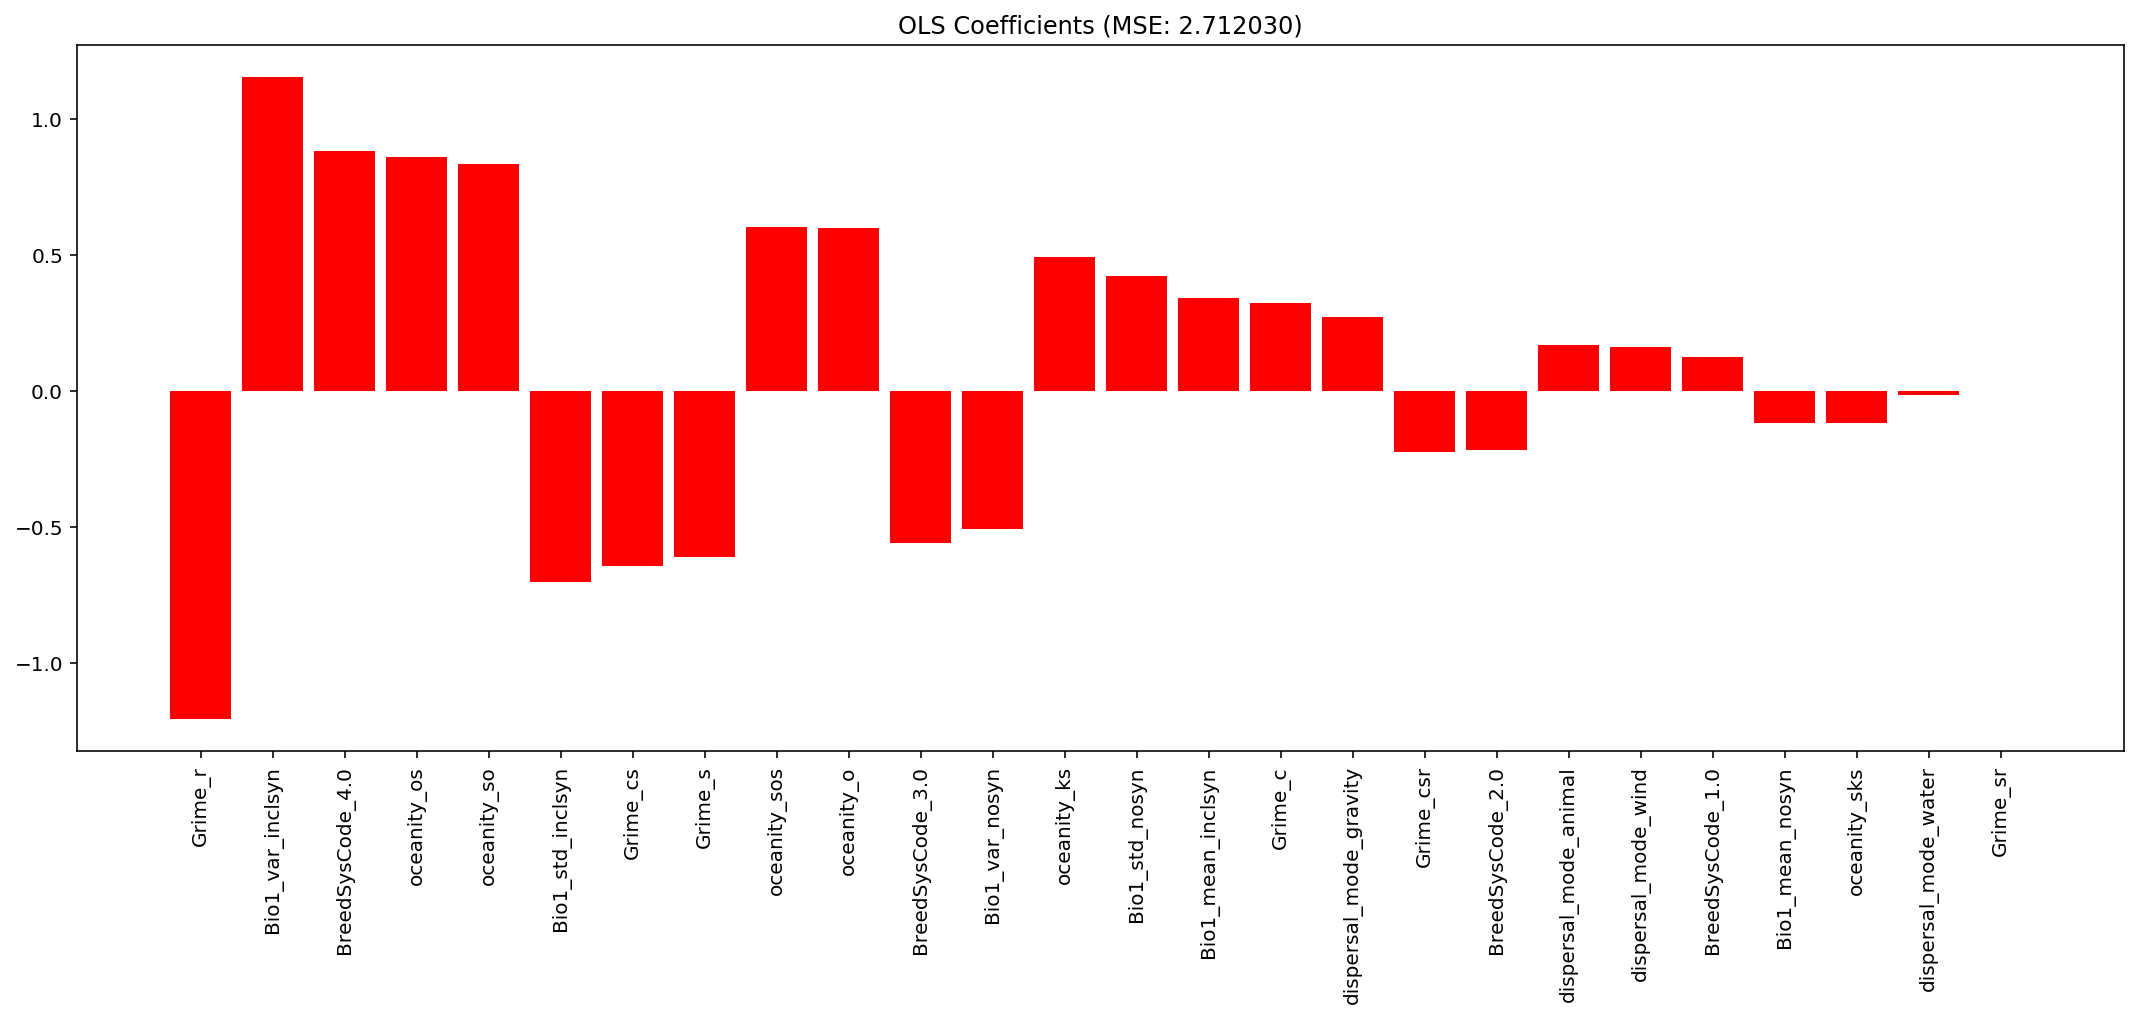

In [4]:
f, ax = plt.subplots()
bar_indices = np.arange(X.shape[1])
bar_width = 0.85
importances_ind = np.argsort(abs(ols.coef_))[::-1]

print(ols.coef_)


plt.bar(bar_indices,
        ols.coef_[importances_ind],
        bar_width,
        color='r',
        align='center', bottom=0)

plt.xticks(bar_indices, np.array(data.feature_names)[importances_ind], rotation=90)
plt.tight_layout()
plt.title("OLS Coefficients (MSE: %f)" % error)

plt.show()

In [ ]:
lassocv = sklearn.linear_model.RidgeCV(normalize=False)
lassocv.fit(scaled_X,Y)

error = sklearn.metrics.mean_squared_error(y_test, lassocv.predict(scaled_test))


f, ax = plt.subplots()
bar_indices = np.arange(X.shape[1])
bar_width = 0.85
importances_ind = np.argsort(abs(lassocv.coef_))[::-1]

print(lassocv.coef_)


plt.bar(bar_indices,
        lassocv.coef_[importances_ind],
        bar_width,
        color='r',
        align='center', bottom=0)

plt.xticks(bar_indices, np.array(data.feature_names)[importances_ind], rotation=90)
plt.tight_layout()
plt.title("Ridge Coefficients (MSE: %f)" % error)
plt.show()

In [ ]:
np.array(data.feature_names)[importances_ind]

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.kernel_ridge import KernelRidge
kernel = 'linear'
svr = GridSearchCV(SVR(kernel=kernel, gamma=0.1), cv=5,
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2, 2, 5)}, 
                  n_jobs=-1)

kr = GridSearchCV(KernelRidge(kernel=kernel, gamma=0.1), cv=5,
                  param_grid={"alpha": [1e0, 0.1, 1e-2, 1e-3],
                              "gamma": np.logspace(-2, 2, 5)})

In [ ]:
svr.fit(scaled_X, Y)
sklearn.metrics.mean_squared_error(y_test, svr.predict(scaled_test))

In [ ]:
svr.best_estimator_.coef_

In [ ]:
coefs = svr.best_estimator_.coef_[0]
f, ax = plt.subplots()
bar_indices = np.arange(X.shape[1])
bar_width = 0.4
importances_ind = np.argsort(abs(coefs))[::-1]


plt.bar(bar_indices-bar_width/2,
        coefs[importances_ind],
        bar_width,
        color='r',
        align='center', bottom=0, label='Linear Regression')
plt.bar(bar_indices+bar_width/2,
        ols.coef_[importances_ind],
        bar_width,
        color='blue',
        align='center', bottom=0, label='Linear SVR')

plt.xticks(bar_indices, np.array(data.feature_names)[importances_ind], rotation=90)
plt.tight_layout()
ax.legend()
ax.autoscale_view()
plt.show()

In [ ]:
sklearn.linear_model.Lasso